# IBM-Coursera_Capstone - Restaurant Battle of Neighborhoods in Paris

Import the needed Library

In [58]:
## import the needed Library
import pandas as pd
import numpy as np
import urllib
from bs4 import BeautifulSoup
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import geopy
from  geopy.geocoders import Nominatim
nominatim_service = Nominatim(user_agent='X@yy.com') # Important line
geopy.geocoders.options.default_user_agent = "X@yy.com" # Important line
geolocator = Nominatim()

print('package installed')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

package installed


## Part 01 - Data Recovery and Data Frame Creation

### Data Recovery

Data,in geojson format, are available on the web site https://opendata.paris.fr/explore/dataset/arrondissements/export/?location=13,48.85156,2.32327.

I saved these files in the same directory as my jupyter notebook.

In [110]:
geo_borough = json.load(open("arrondissements.geojson")) # Paris arrondissements
geo_neighbourhood = json.load(open("quartier_paris.geojson")) # Paris neighborhoods

In this object, transformed into a dictionary under python, there are two elements: the type and the information (named features)

In [112]:
geo_borough.keys()

dict_keys(['type', 'features'])

In [118]:
geo_borough["type"]

'FeatureCollection'

In [120]:
geo_borough["features"] # the information

[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[2.363828096062925, 48.86750443060333],
     [2.363889283103472, 48.86746799613759],
     [2.363895272057997, 48.86746439462841],
     [2.36390615161445, 48.86745794031929],
     [2.3639604108556, 48.86742562395425],
     [2.364050888403437, 48.86737182228858],
     [2.364136202212002, 48.86732090069028],
     [2.364196150694383, 48.86728527518643],
     [2.364231046057404, 48.867264504998545],
     [2.3642488892099323, 48.8672538841255],
     [2.364262374754115, 48.867231487510104],
     [2.364317526957068, 48.8671399217101],
     [2.364378833526726, 48.86703799037503],
     [2.364437745426764, 48.86694013469137],
     [2.36445371308141, 48.86691372487684],
     [2.364489529577707, 48.86685418348327],
     [2.364499215217103, 48.86683808273435],
     [2.364499503250018, 48.86683760311589],
     [2.364517178379751, 48.866808221039065],
     [2.364544549216028, 48.86676280301149],
     [2.364674522150413, 48.8665

In each object of features list, we also have different Feature type objects.

In [117]:
geo_borough["features"][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In properties fields, there are various useful information, including the longitude and latitude Borough coordinates.

In [161]:
geo_borough["features"][0]['properties']

{'n_sq_co': 750001537,
 'perimetre': 4519.26364836,
 'l_ar': '3ème Ardt',
 'surface': 1170882.82818778,
 'geom_x_y': [48.86287238, 2.3600009859],
 'n_sq_ar': 750000003,
 'l_aroff': 'Temple',
 'c_arinsee': 75103,
 'c_ar': 3}

Number of Boroughs in Paris : 20

In [115]:
len(geo_borough["features"])
nbBoroughs = len(geo_borough["features"])
print('Number of Boroughs in Paris : {}'.format(nbBoroughs))

Number of Boroughs in Paris : 20


Number of Neighbourhoods in Paris : 80

In [116]:
len(geo_neighbourhood["features"])
nbNeighbourhoods = len(geo_neighbourhood["features"])
print('Number of Neibourhoods in Paris : {}'.format(nbNeighbourhoods))


Number of Neibourhoods in Paris : 80


Dans chaque objet de cette liste, nous disposons aussi de différents objets de type Feature.

In [162]:
geo_neighbourhood["features"][0]['properties']

{'n_sq_qu': 750000015,
 'n_sq_ar': 750000004,
 'geom_x_y': [48.851585175, 2.36476795387],
 'c_qu': 15,
 'surface': 487264.93707154,
 'l_qu': 'Arsenal',
 'perimetre': 2878.55965556,
 'c_quinsee': 7510403,
 'c_ar': 4}

### Data Frame Creation

In [163]:
boroughDF = pd.DataFrame({
    "BoroughCode" : [arr["properties"]["c_ar"] for arr in geo_borough["features"]],
    #"PostalCode" : [arr["properties"]["c_arinsee"] for arr in geo_borough["features"]],
    "Borough" : [arr["properties"]["l_aroff"] for arr in geo_borough["features"]],
    "Latitude"     : [arr["properties"]["geom_x_y"][0] for arr in geo_borough["features"]],
    "Longitude"     : [arr["properties"]["geom_x_y"][1] for arr in geo_borough["features"]]
})
boroughDF

,BoroughCode,Borough,Latitude,Longitude
0,3,Temple,48.862872,2.360001
1,7,Palais-Bourbon,48.856174,2.312188
2,13,Gobelins,48.828388,2.362272
3,17,Batignolles-Monceau,48.887327,2.306777
4,20,Ménilmontant,48.863461,2.401188
5,10,Entrepôt,48.876130,2.360728
6,12,Reuilly,48.834974,2.421325
7,5,Panthéon,48.844443,2.350715
8,8,Élysée,48.872721,2.312554
9,15,Vaugirard,48.840085,2.292826


In [164]:
neighbourhoodDF = pd.DataFrame({
    "BoroughCode" : [neigh["properties"]["c_ar"] for neigh in geo_neighbourhood["features"]]
    #,"NeighbourhoodNumber" : [neigh["properties"]['c_qu'] for neigh in geo_neighbourhood["features"]]
    #,"NeighbourhoodCode" : [neigh["properties"]["c_quinsee"] for neigh in geo_neighbourhood["features"]]
    ,"Neighbourhood" : [neigh["properties"]["l_qu"] for neigh in geo_neighbourhood["features"]]
    #,"NeighbourhoodLatitude"     : [neigh["properties"]["geom_x_y"][0] for neigh in geo_neighbourhood["features"]]
    #,"NeighbourhoodLongitude"     : [neigh["properties"]["geom_x_y"][1] for neigh in geo_neighbourhood["features"]]
})
neighbourhoodDF

,BoroughCode,Neighbourhood
0,4,Arsenal
1,5,Jardin-des-Plantes
2,10,Porte-Saint-Martin
3,11,Roquette
4,12,Picpus
...,...,...
75,19,Amérique
76,8,Europe
77,11,Sainte-Marguerite
78,14,Parc-de-Montsouris


### Merge boroughDF with neighbourhoodDF

In [168]:
DF_borough_neighbourhood= boroughDF.set_index('BoroughCode').join(neighbourhoodDF.set_index('BoroughCode')).reset_index()
#borough_neighbourhoodDF.columns = ['BoroughCode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']
DF_borough_neighbourhood.head()
#postalCodesDF_geo = postalCodesDF_combined.set_index('Postal Code').join(postalCodesLatLngDF.set_index('Postal Code')).reset_index()
#postalCodesDF_geo
#postalCodesDF_geo.columns = ['PostalCode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']
#postalCodesDF_geo

,BoroughCode,Borough,Latitude,Longitude,Neighbourhood
0,1,Louvre,48.862563,2.336443,Palais-Royal
1,1,Louvre,48.862563,2.336443,Saint-Germain-l'Auxerrois
2,1,Louvre,48.862563,2.336443,Halles
3,1,Louvre,48.862563,2.336443,Place-Vendôme
4,2,Bourse,48.868279,2.342803,Vivienne


More than one neighborhood can exist in one postal code area.Rows will be combined into one row with the neighborhoods separated with a comma

In [171]:
DF_BoroughCode_combined =DF_borough_neighbourhood.groupby(['BoroughCode', 'Borough','Latitude','Longitude'])['Neighbourhood'].apply(lambda x: "%s" % ', '.join(x))
#convert into dataframe
DF_BoroughCode_combined = DF_BoroughCode_combined.to_frame().reset_index()
DF_BoroughCode_combined

,BoroughCode,Borough,Latitude,Longitude,Neighbourhood
0,1,Louvre,48.862563,2.336443,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle..."
1,2,Bourse,48.868279,2.342803,"Vivienne, Mail, Bonne-Nouvelle, Gaillon"
2,3,Temple,48.862872,2.360001,"Sainte-Avoie, Arts-et-Métiers, Archives, Enfan..."
3,4,Hôtel-de-Ville,48.854341,2.357630,"Arsenal, Saint-Gervais, Saint-Merri, Notre-Dame"
4,5,Panthéon,48.844443,2.350715,"Jardin-des-Plantes, Sorbonne, Saint-Victor, Va..."
5,6,Luxembourg,48.849130,2.332898,"Notre-Dame-des-Champs, Saint-Germain-des-Prés,..."
6,7,Palais-Bourbon,48.856174,2.312188,"Saint-Thomas-d'Aquin, Ecole-Militaire, Gros-Ca..."
7,8,Élysée,48.872721,2.312554,"Madeleine, Faubourg-du-Roule, Champs-Elysées, ..."
8,9,Opéra,48.877164,2.337458,"Saint-Georges, Chaussée-d'Antin, Rochechouart,..."
9,10,Entrepôt,48.876130,2.360728,"Porte-Saint-Martin, Porte-Saint-Denis, Hôpital..."


### Print out the final DataFrame : using.shape() print the number of rows of the dataframe

In [176]:
DF_BoroughCode_combined.shape

(20, 5)

## Part 02 - Get the geograpical coordinate 

### Get the geograpical coordinate of Paris

In [172]:
address = 'PARIS'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of PARIS are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of PARIS are 48.8566969, 2.3514616.


### Marqueur par arrondissement

With the information contained in geom_x_y, we will be able to add a marker for each district, by putting the name of the district in the popup.

In [175]:
paris_arr_marker = folium.Map(location = [latitude, longitude], zoom_start = 12)
for arr in geo_borough["features"]:
    prop = arr["properties"]
    folium.Marker(prop["geom_x_y"], popup = prop["l_ar"]).add_to(paris_arr_marker)
paris_arr_marker

### FourSquare credential and version

In [177]:
CLIENT_ID = 'GU0EJCBEB0ACFSSHLIN1LY2QMDXMYC0GRPPYT1VSEMVDFTXM' # your Foursquare ID
CLIENT_SECRET = 'HKGI0ZJHHULNL2IKG0PXH42ILENLMQY3DJUCEDD1DQC1WSAH' # your Foursquare Secret
ACCESS_TOKEN = 'AQBQX232OWVPICDQ1YUWR4J2LZCTZM012NLPYZTTUROY3VP0' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GU0EJCBEB0ACFSSHLIN1LY2QMDXMYC0GRPPYT1VSEMVDFTXM
CLIENT_SECRET:HKGI0ZJHHULNL2IKG0PXH42ILENLMQY3DJUCEDD1DQC1WSAH


In [178]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Get Paris Venues

In [179]:
paris_venues = getNearbyVenues(names=DF_BoroughCode_combined['Neighbourhood'],
                               latitudes=DF_BoroughCode_combined['Latitude'],
                               longitudes=DF_BoroughCode_combined['Longitude']
                                  )

Palais-Royal, Saint-Germain-l'Auxerrois, Halles, Place-Vendôme
Vivienne, Mail, Bonne-Nouvelle, Gaillon
Sainte-Avoie, Arts-et-Métiers, Archives, Enfants-Rouges
Arsenal, Saint-Gervais, Saint-Merri, Notre-Dame
Jardin-des-Plantes, Sorbonne, Saint-Victor, Val-de-Grâce
Notre-Dame-des-Champs, Saint-Germain-des-Prés, Monnaie, Odéon
Saint-Thomas-d'Aquin, Ecole-Militaire, Gros-Caillou, Invalides
Madeleine, Faubourg-du-Roule, Champs-Elysées, Europe
Saint-Georges, Chaussée-d'Antin, Rochechouart, Faubourg-Montmartre
Porte-Saint-Martin, Porte-Saint-Denis, Hôpital-Saint-Louis, Saint-Vincent-de-Paul
Roquette, Saint-Ambroise, Folie-Méricourt, Sainte-Marguerite
Picpus, Quinze-Vingts, Bel-Air, Bercy
Gare, Salpêtrière, Maison-Blanche, Croulebarbe
Plaisance, Petit-Montrouge, Montparnasse, Parc-de-Montsouris
Necker, Grenelle, Javel, Saint-Lambert
Porte-Dauphine, Auteuil, Muette, Chaillot
Batignolles, Epinettes, Ternes, Plaine de Monceaux
Grandes-Carrières, La Chapelle, Clignancourt, Goutte-d'Or
Villette, Po

In [180]:
paris_venues.head()

,Neighbourhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",48.862563,2.336443,Musée du Louvre,48.860847,2.336440,Art Museum
1,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",48.862563,2.336443,Palais Royal,48.863236,2.337127,Historic Site
2,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",48.862563,2.336443,Comédie-Française,48.863088,2.336612,Theater
3,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",48.862563,2.336443,Cour Napoléon,48.861172,2.335088,Plaza
4,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",48.862563,2.336443,Place du Palais Royal,48.862523,2.336688,Plaza


In [138]:
paris_venues.shape

(1261, 7)

In [223]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
paris_venues_only_restaurant = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
paris_venues_only_restaurant.index = np.arange(1, len(paris_venues_only_restaurant )+1)

In [224]:
print (paris_venues_only_restaurant['Venue Category'].value_counts())

French Restaurant                 165
Italian Restaurant                 50
Japanese Restaurant                33
Restaurant                         22
Vietnamese Restaurant              22
Asian Restaurant                   18
Thai Restaurant                    15
Seafood Restaurant                 10
Chinese Restaurant                  9
Indian Restaurant                   8
Vegetarian / Vegan Restaurant       7
Korean Restaurant                   7
Mediterranean Restaurant            6
Mexican Restaurant                  6
Lebanese Restaurant                 6
Moroccan Restaurant                 5
Greek Restaurant                    5
Sushi Restaurant                    5
Turkish Restaurant                  4
African Restaurant                  4
Fast Food Restaurant                3
Scandinavian Restaurant             3
Falafel Restaurant                  3
Portuguese Restaurant               3
Latin American Restaurant           3
Israeli Restaurant                  3
Corsican Res

In [225]:
print('There are {} unique categories.'.format(len(paris_venues_only_restaurant['Venue Category'].unique())))

There are 58 unique categories.


In [226]:
# create a dataframe of top 10 categories
paris_venues_only_restaurant_Top10 = paris_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
paris_venues_only_restaurant_Top10 = paris_venues_only_restaurant_Top10.reset_index()
paris_venues_only_restaurant_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
paris_venues_only_restaurant_Top10

,Venue_Category,Frequency
0,French Restaurant,165
1,Italian Restaurant,50
2,Japanese Restaurant,33
3,Restaurant,22
4,Vietnamese Restaurant,22
5,Asian Restaurant,18
6,Thai Restaurant,15
7,Seafood Restaurant,10
8,Chinese Restaurant,9
9,Indian Restaurant,8


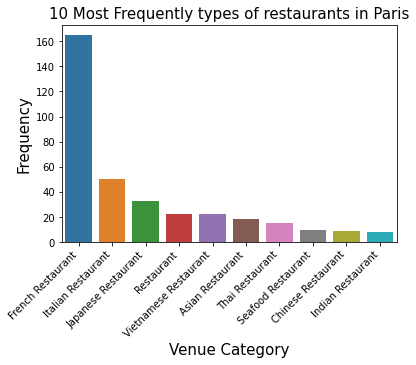

<Figure size 1296x504 with 0 Axes>

In [232]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=paris_venues_only_restaurant_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently types of restaurants in Paris', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [181]:
paris_venues.groupby('Neighbourhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Arsenal, Saint-Gervais, Saint-Merri, Notre-Dame",100,100,100,100,100,100
"Batignolles, Epinettes, Ternes, Plaine de Monceaux",57,57,57,57,57,57
"Gare, Salpêtrière, Maison-Blanche, Croulebarbe",60,60,60,60,60,60
"Grandes-Carrières, La Chapelle, Clignancourt, Goutte-d'Or",44,44,44,44,44,44
"Jardin-des-Plantes, Sorbonne, Saint-Victor, Val-de-Grâce",88,88,88,88,88,88
"Madeleine, Faubourg-du-Roule, Champs-Elysées, Europe",41,41,41,41,41,41
"Necker, Grenelle, Javel, Saint-Lambert",63,63,63,63,63,63
"Notre-Dame-des-Champs, Saint-Germain-des-Prés, Monnaie, Odéon",48,48,48,48,48,48
"Palais-Royal, Saint-Germain-l'Auxerrois, Halles, Place-Vendôme",82,82,82,82,82,82


In [184]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")
#paris_onehot.drop(['Neighborhood'],axis=1,inplace=True)  
paris_onehot.insert(loc=0, column='Neighbourhood', value=paris_venues['Neighbourhood'] )
paris_onehot.shape

(1262, 197)

In [185]:
paris_onehot

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,"Saint-Fargeau, Père-Lachaise, Belleville, Char...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1258,"Saint-Fargeau, Père-Lachaise, Belleville, Char...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1259,"Saint-Fargeau, Père-Lachaise, Belleville, Char...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1260,"Saint-Fargeau, Père-Lachaise, Belleville, Char...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
paris_grouped = paris_onehot.groupby('Neighbourhood').mean().reset_index()
paris_grouped.head()

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,"Arsenal, Saint-Gervais, Saint-Merri, Notre-Dame",0.0,0.01,0.0,0.0,0.0,0.02,0.010000,0.01,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.030000,0.0,0.0,0.0,0.0
1,"Batignolles, Epinettes, Ternes, Plaine de Monc...",0.0,0.00,0.0,0.0,0.0,0.00,0.017544,0.00,0.017544,...,0.0,0.017544,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,"Gare, Salpêtrière, Maison-Blanche, Croulebarbe",0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.00,0.200000,...,0.0,0.000000,0.000000,0.0,0.216667,0.000000,0.0,0.0,0.0,0.0
3,"Grandes-Carrières, La Chapelle, Clignancourt, ...",0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,...,0.0,0.000000,0.022727,0.0,0.022727,0.022727,0.0,0.0,0.0,0.0
4,"Jardin-des-Plantes, Sorbonne, Saint-Victor, Va...",0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.0,0.022727,0.022727,0.0,0.0,0.0,0.0


In [187]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [189]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = paris_grouped['Neighbourhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arsenal, Saint-Gervais, Saint-Merri, Notre-Dame",French Restaurant,Ice Cream Shop,Clothing Store,Pastry Shop,Hotel,Wine Bar,Pedestrian Plaza,Plaza,Italian Restaurant,Bistro
1,"Batignolles, Epinettes, Ternes, Plaine de Monc...",French Restaurant,Hotel,Italian Restaurant,Plaza,Restaurant,Bakery,Bistro,Café,Japanese Restaurant,Burger Joint
2,"Gare, Salpêtrière, Maison-Blanche, Croulebarbe",Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Bus Stop,Plaza,Sandwich Place,Cambodian Restaurant
3,"Grandes-Carrières, La Chapelle, Clignancourt, ...",Bar,French Restaurant,Café,Restaurant,Convenience Store,Pizza Place,Park,Sandwich Place,Cheese Shop,Pool
4,"Jardin-des-Plantes, Sorbonne, Saint-Victor, Va...",French Restaurant,Hotel,Italian Restaurant,Science Museum,Plaza,Bakery,Café,Pub,Coffee Shop,Bar
5,"Madeleine, Faubourg-du-Roule, Champs-Elysées, ...",French Restaurant,Hotel,Bakery,Corsican Restaurant,Art Gallery,Italian Restaurant,Spa,Park,Plaza,Resort
6,"Necker, Grenelle, Javel, Saint-Lambert",Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Bistro,Japanese Restaurant,Indian Restaurant,Supermarket,Park,Lebanese Restaurant
7,"Notre-Dame-des-Champs, Saint-Germain-des-Prés,...",French Restaurant,Bakery,Chocolate Shop,Cocktail Bar,Fountain,Pastry Shop,Plaza,Dessert Shop,Bistro,Pharmacy
8,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",French Restaurant,Plaza,Japanese Restaurant,Hotel,Italian Restaurant,Coffee Shop,Art Museum,Clothing Store,Thai Restaurant,Restaurant
9,"Picpus, Quinze-Vingts, Bel-Air, Bercy",Zoo Exhibit,Supermarket,Monument / Landmark,Zoo,Antique Shop,Donut Shop,African Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


## Part 03 - Explore and cluster the neighborhoods in Paris

### Running K-Means with a range of k

We can easily run K-Means for a range of clusters using a for loop and collecting the distortions into a list.

In [190]:
paris_grouped_clustering = paris_grouped.drop('Neighbourhood', 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(paris_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

### Plotting the distortions of K-Means

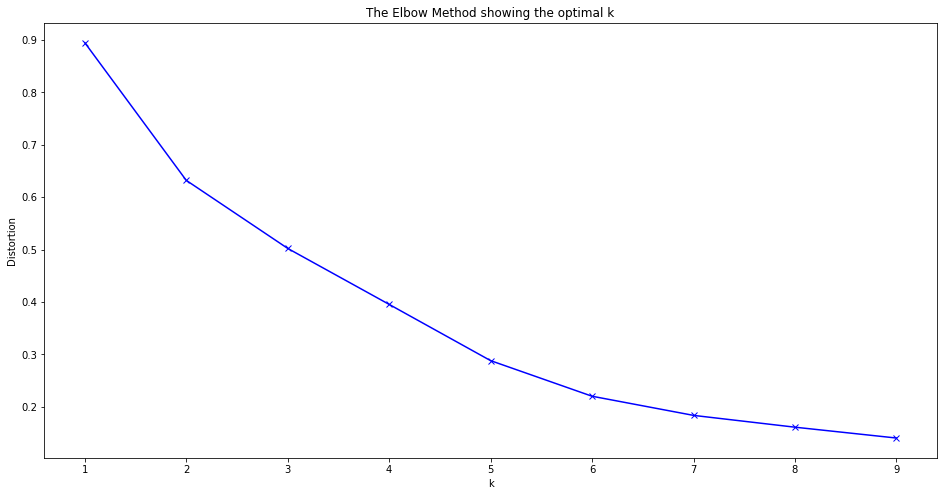

In [192]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Run k-means to cluster the neighbourhoods into 5 clusters

In [193]:
# set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 4, 1, 1, 3, 1, 1, 1, 2], dtype=int32)

In [194]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,"Arsenal, Saint-Gervais, Saint-Merri, Notre-Dame",French Restaurant,Ice Cream Shop,Clothing Store,Pastry Shop,Hotel,Wine Bar,Pedestrian Plaza,Plaza,Italian Restaurant,Bistro
1,3,"Batignolles, Epinettes, Ternes, Plaine de Monc...",French Restaurant,Hotel,Italian Restaurant,Plaza,Restaurant,Bakery,Bistro,Café,Japanese Restaurant,Burger Joint
2,4,"Gare, Salpêtrière, Maison-Blanche, Croulebarbe",Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Bus Stop,Plaza,Sandwich Place,Cambodian Restaurant
3,1,"Grandes-Carrières, La Chapelle, Clignancourt, ...",Bar,French Restaurant,Café,Restaurant,Convenience Store,Pizza Place,Park,Sandwich Place,Cheese Shop,Pool
4,1,"Jardin-des-Plantes, Sorbonne, Saint-Victor, Va...",French Restaurant,Hotel,Italian Restaurant,Science Museum,Plaza,Bakery,Café,Pub,Coffee Shop,Bar
5,3,"Madeleine, Faubourg-du-Roule, Champs-Elysées, ...",French Restaurant,Hotel,Bakery,Corsican Restaurant,Art Gallery,Italian Restaurant,Spa,Park,Plaza,Resort
6,1,"Necker, Grenelle, Javel, Saint-Lambert",Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Bistro,Japanese Restaurant,Indian Restaurant,Supermarket,Park,Lebanese Restaurant
7,1,"Notre-Dame-des-Champs, Saint-Germain-des-Prés,...",French Restaurant,Bakery,Chocolate Shop,Cocktail Bar,Fountain,Pastry Shop,Plaza,Dessert Shop,Bistro,Pharmacy
8,1,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",French Restaurant,Plaza,Japanese Restaurant,Hotel,Italian Restaurant,Coffee Shop,Art Museum,Clothing Store,Thai Restaurant,Restaurant
9,2,"Picpus, Quinze-Vingts, Bel-Air, Bercy",Zoo Exhibit,Supermarket,Monument / Landmark,Zoo,Antique Shop,Donut Shop,African Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


### Récupérer N° Arrondissement- LATITUDE-LONGITUDE avant de faire une map

In [213]:
DF_paris_cluster = neighborhoods_venues_sorted.set_index('Neighbourhood').join(DF_BoroughCode_combined.set_index('Neighbourhood')).reset_index()
DF_paris_cluster

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,BoroughCode,Borough,Latitude,Longitude
0,"Arsenal, Saint-Gervais, Saint-Merri, Notre-Dame",1,French Restaurant,Ice Cream Shop,Clothing Store,Pastry Shop,Hotel,Wine Bar,Pedestrian Plaza,Plaza,Italian Restaurant,Bistro,4,Hôtel-de-Ville,48.854341,2.357630
1,"Batignolles, Epinettes, Ternes, Plaine de Monc...",3,French Restaurant,Hotel,Italian Restaurant,Plaza,Restaurant,Bakery,Bistro,Café,Japanese Restaurant,Burger Joint,17,Batignolles-Monceau,48.887327,2.306777
2,"Gare, Salpêtrière, Maison-Blanche, Croulebarbe",4,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Bus Stop,Plaza,Sandwich Place,Cambodian Restaurant,13,Gobelins,48.828388,2.362272
3,"Grandes-Carrières, La Chapelle, Clignancourt, ...",1,Bar,French Restaurant,Café,Restaurant,Convenience Store,Pizza Place,Park,Sandwich Place,Cheese Shop,Pool,18,Buttes-Montmartre,48.892569,2.348161
4,"Jardin-des-Plantes, Sorbonne, Saint-Victor, Va...",1,French Restaurant,Hotel,Italian Restaurant,Science Museum,Plaza,Bakery,Café,Pub,Coffee Shop,Bar,5,Panthéon,48.844443,2.350715
5,"Madeleine, Faubourg-du-Roule, Champs-Elysées, ...",3,French Restaurant,Hotel,Bakery,Corsican Restaurant,Art Gallery,Italian Restaurant,Spa,Park,Plaza,Resort,8,Élysée,48.872721,2.312554
6,"Necker, Grenelle, Javel, Saint-Lambert",1,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Bistro,Japanese Restaurant,Indian Restaurant,Supermarket,Park,Lebanese Restaurant,15,Vaugirard,48.840085,2.292826
7,"Notre-Dame-des-Champs, Saint-Germain-des-Prés,...",1,French Restaurant,Bakery,Chocolate Shop,Cocktail Bar,Fountain,Pastry Shop,Plaza,Dessert Shop,Bistro,Pharmacy,6,Luxembourg,48.849130,2.332898
8,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",1,French Restaurant,Plaza,Japanese Restaurant,Hotel,Italian Restaurant,Coffee Shop,Art Museum,Clothing Store,Thai Restaurant,Restaurant,1,Louvre,48.862563,2.336443
9,"Picpus, Quinze-Vingts, Bel-Air, Bercy",2,Zoo Exhibit,Supermarket,Monument / Landmark,Zoo,Antique Shop,Donut Shop,African Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,12,Reuilly,48.834974,2.421325


In [221]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(DF_paris_cluster['Latitude'], DF_paris_cluster['Longitude'], DF_paris_cluster['Neighbourhood'], DF_paris_cluster['Cluster Labels']):
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [222]:
found = DF_paris_cluster[DF_paris_cluster['1st Most Common Venue'].str.contains('Restaurant')]
print(found.count())

Neighbourhood             15
Cluster Labels            15
1st Most Common Venue     15
2nd Most Common Venue     15
3rd Most Common Venue     15
4th Most Common Venue     15
5th Most Common Venue     15
6th Most Common Venue     15
7th Most Common Venue     15
8th Most Common Venue     15
9th Most Common Venue     15
10th Most Common Venue    15
BoroughCode               15
Borough                   15
Latitude                  15
Longitude                 15
dtype: int64


### Examine Clusters

We can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

Cluster 1

In [205]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 0, neighborhoods_venues_sorted.columns[[1] + list(range(2, neighborhoods_venues_sorted.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"Porte-Dauphine, Auteuil, Muette, Chaillot",Plaza,Lake,Park,Bus Stop,Bus Station,French Restaurant,Boat or Ferry,Pool,Art Museum,Halal Restaurant


Cluster2

In [206]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 1, neighborhoods_venues_sorted.columns[[1] + list(range(2, neighborhoods_venues_sorted.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arsenal, Saint-Gervais, Saint-Merri, Notre-Dame",French Restaurant,Ice Cream Shop,Clothing Store,Pastry Shop,Hotel,Wine Bar,Pedestrian Plaza,Plaza,Italian Restaurant,Bistro
3,"Grandes-Carrières, La Chapelle, Clignancourt, ...",Bar,French Restaurant,Café,Restaurant,Convenience Store,Pizza Place,Park,Sandwich Place,Cheese Shop,Pool
4,"Jardin-des-Plantes, Sorbonne, Saint-Victor, Va...",French Restaurant,Hotel,Italian Restaurant,Science Museum,Plaza,Bakery,Café,Pub,Coffee Shop,Bar
6,"Necker, Grenelle, Javel, Saint-Lambert",Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Bistro,Japanese Restaurant,Indian Restaurant,Supermarket,Park,Lebanese Restaurant
7,"Notre-Dame-des-Champs, Saint-Germain-des-Prés,...",French Restaurant,Bakery,Chocolate Shop,Cocktail Bar,Fountain,Pastry Shop,Plaza,Dessert Shop,Bistro,Pharmacy
8,"Palais-Royal, Saint-Germain-l'Auxerrois, Halle...",French Restaurant,Plaza,Japanese Restaurant,Hotel,Italian Restaurant,Coffee Shop,Art Museum,Clothing Store,Thai Restaurant,Restaurant
12,"Porte-Saint-Martin, Porte-Saint-Denis, Hôpital...",French Restaurant,Bistro,Coffee Shop,Hotel,Café,Indian Restaurant,Pizza Place,Bakery,Breakfast Spot,Japanese Restaurant
13,"Roquette, Saint-Ambroise, Folie-Méricourt, Sai...",French Restaurant,Café,Restaurant,Supermarket,Pastry Shop,Italian Restaurant,Bakery,Japanese Restaurant,Cocktail Bar,Wine Bar
14,"Saint-Fargeau, Père-Lachaise, Belleville, Char...",Bakery,Hotel,Japanese Restaurant,Plaza,French Restaurant,Bistro,Café,Italian Restaurant,Pizza Place,Bar
17,"Sainte-Avoie, Arts-et-Métiers, Archives, Enfan...",French Restaurant,Japanese Restaurant,Art Gallery,Sandwich Place,Burger Joint,Wine Bar,Cocktail Bar,Coffee Shop,Italian Restaurant,Bakery


Cluster 3

In [207]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 2, neighborhoods_venues_sorted.columns[[1] + list(range(2, neighborhoods_venues_sorted.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,"Picpus, Quinze-Vingts, Bel-Air, Bercy",Zoo Exhibit,Supermarket,Monument / Landmark,Zoo,Antique Shop,Donut Shop,African Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


Cluster 4

In [208]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 3, neighborhoods_venues_sorted.columns[[1] + list(range(2, neighborhoods_venues_sorted.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Batignolles, Epinettes, Ternes, Plaine de Monc...",French Restaurant,Hotel,Italian Restaurant,Plaza,Restaurant,Bakery,Bistro,Café,Japanese Restaurant,Burger Joint
5,"Madeleine, Faubourg-du-Roule, Champs-Elysées, ...",French Restaurant,Hotel,Bakery,Corsican Restaurant,Art Gallery,Italian Restaurant,Spa,Park,Plaza,Resort
10,"Plaisance, Petit-Montrouge, Montparnasse, Parc...",French Restaurant,Hotel,Bistro,Brasserie,Italian Restaurant,Food & Drink Shop,Sushi Restaurant,Pizza Place,Fast Food Restaurant,Tea Room
15,"Saint-Georges, Chaussée-d'Antin, Rochechouart,...",French Restaurant,Hotel,Bakery,Cocktail Bar,Bistro,Bar,Japanese Restaurant,Lounge,Wine Bar,Turkish Restaurant
16,"Saint-Thomas-d'Aquin, Ecole-Militaire, Gros-Ca...",Hotel,French Restaurant,Italian Restaurant,Plaza,Café,Coffee Shop,History Museum,Cocktail Bar,Bistro,Gourmet Shop


Cluster 5

In [209]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 4, neighborhoods_venues_sorted.columns[[1] + list(range(2, neighborhoods_venues_sorted.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Gare, Salpêtrière, Maison-Blanche, Croulebarbe",Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Bus Stop,Plaza,Sandwich Place,Cambodian Restaurant
